# Project: Social Media Analytics (US Airline Tweets dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dataprep">A. Data Preparation</a></li>
<li><a href="#eda"> B. Exploratory Data Analysis from Dataset</a></li>
<li><a href="#modeling">C. Modeling</a></li>
<li><a href="#wordcloud">D. Wordcloud</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>To complete my Data Analysis project I am using IMDB dataset. 

>This data set contains information 50.000 reviews. It consist of 2 columns: reviews and sentiment.   

>#### **Question that can analysed from this data set**
> 1. The number of tweets each airlines has received
> 2. The number of each type of sentiments  
> 3. Preprocessing for Modeling, such as : Text normalization, Removing html strips and noise text, Removing special characters, Text stemming, and Removing stopwords.
> 4. Splitting the data into train and test to making Logistic Linear Model
> 5. Making confussion matrices and get the accuration from Logistic Linear Model
> 6. Visualization using wordcloud for the negative and positive tweets



In [26]:
#!pip install wordcloud 

#import libraries
import pandas as pd 
import numpy as np

#Authentication module. for documentation
import tweepy as tp

#import sklearn module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import LogisticRegression,SGDClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer

from bs4 import BeautifulSoup

#import reguler expression 
import re

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dwilar064174\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='dataprep'></a>

# A. Data Preparation

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


<a id='eda'></a>
#  B : Exploratory Data Analysis from Dataset

## B.1. Simply EDA

In [3]:
dataset=df
#dataset shape
dataset.shape

(50000, 2)

In [8]:
#counting the number of tweets each airlines has received 
dataset['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

Text(0,0.5,'No. of Tweets')

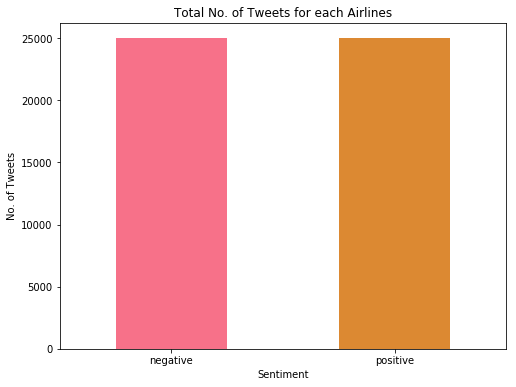

In [11]:
#Plotting the number of tweets each sentiment has received
colors=sns.color_palette("husl", 10) 
pd.Series(dataset["sentiment"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

From number of negative and positive sentiments, we can say Dataset is balanced

<a id='modeling'></a>
# C. Modeling 

## C.1. Train Test Split

In [4]:
#split the dataset  
#train dataset
train_reviews=dataset.review[:40000]
train_sentiments=dataset.sentiment[:40000]
#test dataset
test_reviews=dataset.review[40000:]
test_sentiments=dataset.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


## C.2. Preprocessing for Modeling

### (1) Text Normalization

In [5]:
#from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### (2) Removing html strips and noise text

In [6]:
#from bs4 import BeautifulSoup

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
dataset['review']=dataset['review'].apply(denoise_text)

In [18]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### (3) Removing special characters

In [7]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
dataset['review']=dataset['review'].apply(remove_special_characters)

In [21]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### (4) Text Stemming

In [8]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
dataset['review']=dataset['review'].apply(simple_stemmer)
dataset.head(10)

KeyboardInterrupt: 

### (5) Removing Stopwords

In [9]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
dataset['review']=dataset['review'].apply(remove_stopwords)

{'each', 'mustn', "wasn't", 'between', 'here', "you'll", 'y', 'at', "mustn't", "it's", 'while', "don't", 'your', 'but', 're', 'be', 'hers', "isn't", 'further', 'd', 'him', 'my', 'once', 'and', 'its', 'any', "shan't", 'of', 'off', 'are', 'other', 'such', 'no', 'below', 'too', 'you', "she's", 'because', 'how', "won't", "haven't", "doesn't", 'up', 'over', 'from', 'why', 't', 'is', 'wasn', 'few', 'our', 'which', 'nor', 'm', 'haven', 'into', 'with', 'will', 'she', 'again', 'very', 'just', 'won', 'been', 'ma', 'have', 'than', 'all', 'both', 'some', 'isn', 'wouldn', 'themselves', 'needn', 'ours', 'had', 'above', 'these', 'couldn', "couldn't", 'before', 'out', 'who', 'after', "aren't", 'those', 'he', 'did', 'until', 'his', 'this', "wouldn't", 'it', 'should', 'where', "hasn't", 'they', 'yours', 'that', 'we', 'then', "needn't", 'aren', 'having', "you've", 'hadn', 'ourselves', 'herself', 'were', 'more', 'weren', 'mightn', 'll', 'whom', 'ain', 'shan', 'don', 'her', 'didn', 'under', 'me', 'them', '

### (5) Normalized train reviews and test reviews

In [11]:
#normalized train reviews
norm_train_reviews=dataset.review[:40000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

#Normalized test reviews
norm_test_reviews=dataset.review[40000:]
norm_test_reviews[45005]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'read reviews watching piece cinematic garbage took least 2 pages find somebody else didnt think appallingly unfunny montage WASNT acme humour 70s indeed era isnt least funny set sketch comedy Ive ever seen itll till comes along Half skits already done infinitely better acts Monty Python Woody Allen say nice piece animation lasts 90 seconds highlight film would still get close summing mindless drivelridden waste 75 minutes Seminal comedy world seminal really mean semen Scatological humour world scat actually feces Precursor jokes mean handbook comedy Tits bums odd beaver Niceif pubescent boy least one hand free havent found Playboy exists Give break early 70s way sketch comedy going back least ten years prior way could even forgive film even made gunpoint Retro Hardly Sketches clowns subtly perverting children may cutting edge circles could actually funny comes really quite sad kept going throughout entire 75 minutes Sheer belief may saved genuinely funny skit end gave film 1 lower sco

### (6) Bags of words model

>It is used to convert text documents to numerical vectors or bag of words.

In [14]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6675870)
BOW_cv_test: (10000, 6675870)


### (7) Term Frequency-Inverse Document Frequency model (TFIDF)
>It is used to convert text documents to matrix of tfidf features

In [15]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6675870)
Tfidf_test: (10000, 6675870)


## C.3 Labeling the sentiment text

In [19]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(dataset['sentiment'])
print(sentiment_data.shape)

(50000, 1)


### (1) Split the sentiment tdata

In [20]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### (2) Modelling the dataset
>Let us build logistic regression model for both bag of words and tfidf features

In [23]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### (3) Logistic regression model performane on test dataset

In [24]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


### (4) Accuracy of the model

In [27]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.743
lr_tfidf_score : 0.7439


### (5) Print the classification report with confusion matrix

In [28]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

             precision    recall  f1-score   support

   Positive       0.74      0.75      0.74      4993
   Negative       0.75      0.74      0.74      5007

avg / total       0.74      0.74      0.74     10000

             precision    recall  f1-score   support

   Positive       0.73      0.77      0.75      4993
   Negative       0.76      0.72      0.74      5007

avg / total       0.74      0.74      0.74     10000



In [29]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3699 1308]
 [1262 3731]]
[[3600 1407]
 [1154 3839]]


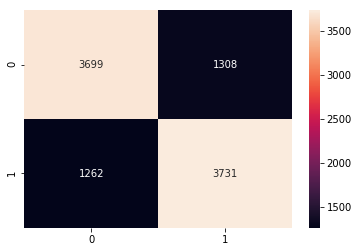

In [32]:
import seaborn as sns
sns.heatmap(cm_bow,annot=True,fmt='d')

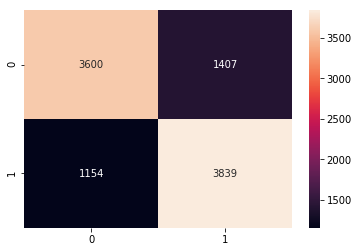

In [33]:
sns.heatmap(cm_tfidf,annot=True,fmt='d')

<a id='wordcloud'></a>
# D. Wordcloud 

<function matplotlib.pyplot.show>

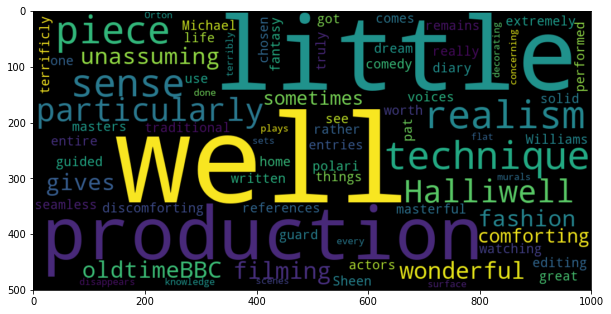

In [30]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

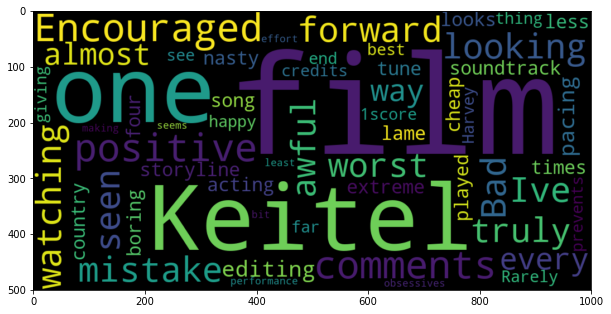

In [31]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show